In [1]:
Threads.nthreads()

8

In [2]:
push!(LOAD_PATH, "/home/aaron/projects/Ising/src/Julia");

In [3]:
using SpinBodies, WalterMethod
using Plots, LaTeXStrings, Statistics

┌ Info: Precompiling SpinBodies [top-level]
└ @ Base loading.jl:1278


In [240]:
T = 1.0
n = 40;

In [248]:
mainlattice = SpinLattice(n, T)
nmeas = 50
dm = 1_000_000;

In [249]:
function step_measurements()
    lattice = copy(mainlattice)
    tree = WalterTree(ps(lattice))
    Ms = Vector{Float64}(undef, nmeas)
    μs = Vector{Float64}(undef, nmeas)
    σs = Vector{Float64}(undef, nmeas)
    wsum = 0
    for i = 1:dm*(nmeas + 20)
        walter_step!(lattice, tree)
        if i > 20dm && i % dm == 0
            measure!(lattice)            
            m = div(i - 20dm, dm)
            w = lattice.N / tree.psum
            wsum += w
            Ms[m] = abs(lattice.M) * w
            if length(Ms) > 1
                μs[m] = mean(Ms[1:m])
                σs[m] = std(Ms[1:m])
            end
        end
    end
    return Ms, μs / wsum, σs / wsum
end;

In [250]:
function weight_measurements()
    lattice = copy(mainlattice)
    tree = WalterTree(ps(lattice))
    Ms = Vector{Float64}(undef, nmeas)
    μs = Vector{Float64}(undef, nmeas)
    σs = Vector{Float64}(undef, nmeas)
    m = 1
    i = 0
    while m <= nmeas
        walter_step!(lattice, tree)
        if i > 20dm && lattice.wsum > dm
            measure!(lattice)
            Ms[m] = abs(lattice.M)
            if length(Ms) > 1
                μs[m] = mean(Ms[1:m])
                σs[m] = std(Ms[1:m])
            end
            lattice.wsum = 0
            m += 1
        end
        i += 1
    end
    return Ms, μs, σs
end;

In [251]:
function metropolis_measurements()
    lattice = copy(mainlattice)
    Ms = Vector{Float64}(undef, nmeas)
    μs = Vector{Float64}(undef, nmeas)
    σs = Vector{Float64}(undef, nmeas)
    for i = 1:dm*(nmeas + 20)
        metropolis_step!(lattice)
        if i > 20dm && i % dm == 0 
            measure!(lattice)
            m = div(i - 20dm, dm)
            Ms[m] = abs(lattice.M)
            if length(Ms) > 1
                μs[m] = mean(Ms[1:m])
                σs[m] = std(Ms[1:m])
            end
        end
    end
    return Ms, μs, σs
end;

In [252]:
ms = 1:nmeas
sMs, sμs, sσs = step_measurements()
wMs, wμs, wσs = weight_measurements()
mMs, mμs, mσs = metropolis_measurements();

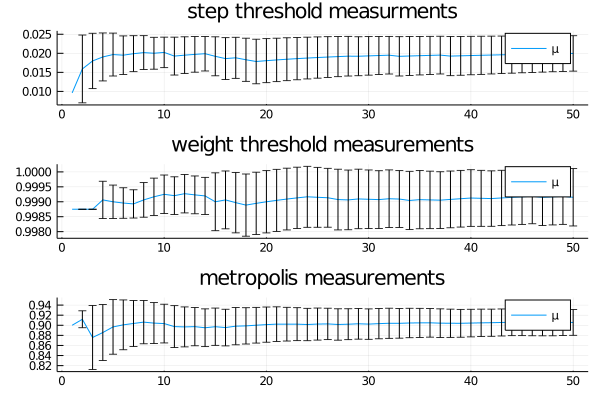

In [253]:
sp = plot(ms, sμs, yerror=sσs, title="step threshold measurments", label="μ")
wp = plot(ms, wμs, yerror=wσs, title="weight threshold measurements", label="μ")
mp = plot(ms, mμs, yerror=mσs, title="metropolis measurements", label="μ")
l = @layout [a ; b ; c]
plot(sp, wp, mp, layout=l)

In [254]:
mMs

50-element Array{Float64,1}:
 0.9
 0.92375
 0.80375
 0.915
 0.94125
 0.92125
 0.92
 0.925
 0.88875
 0.895
 ⋮
 0.9225
 0.91625
 0.925
 0.92625
 0.89625
 0.8875
 0.89125
 0.895
 0.92375
 0.925